In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uraninjo/augmented-alzheimer-mri-dataset")

print("Path to dataset files:", path)

100%|██████████| 380M/380M [00:06<00:00, 64.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/uraninjo/augmented-alzheimer-mri-dataset/versions/1


In [2]:
from google.colab import files

# Descargar el archivo
files.download("kaggle.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
from google.colab import files

# Subir archivo desde tu computadora
uploaded = files.upload()

Saving kaggle (1).json to kaggle (1).json


Saving kaggle (1).json to kaggle (1) (1).json
Dataset URL: https://www.kaggle.com/datasets/uraninjo/augmented-alzheimer-mri-dataset
License(s): GNU Lesser General Public License 3.0
100% 380M/380M [00:18<00:00, 24.6MB/s]
100% 380M/380M [00:18<00:00, 22.0MB/s]
Archivos extraídos: ['AugmentedAlzheimerDataset', 'OriginalDataset']
Found 27188 images belonging to 4 classes.
Found 6796 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


850/850 ━━━━━━━━━━━━━━━━━━━━ 57s 58ms/step - accuracy: 0.4262 - loss: 1.1772 - val_accuracy: 0.6416 - val_loss: 0.7346
Epoch 2/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 68s 47ms/step - accuracy: 0.6377 - loss: 0.7649 - val_accuracy: 0.7089 - val_loss: 0.6038
Epoch 3/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.7080 - loss: 0.6235 - val_accuracy: 0.7788 - val_loss: 0.5069
Epoch 4/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.7600 - loss: 0.5240 - val_accuracy: 0.8300 - val_loss: 0.4065
Epoch 5/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.7986 - loss: 0.4467 - val_accuracy: 0.8492 - val_loss: 0.3729
Epoch 6/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 80s 46ms/step - accuracy: 0.8259 - loss: 0.3873 - val_accuracy: 0.8620 - val_loss: 0.3474
Epoch 7/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.8446 - loss: 0.3481 - val_accuracy: 0.8696 - val_loss: 0.3308
Epoch 8/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 43s 50ms/step - accuracy: 0.8593 - loss: 0.3178 - val_accurac

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


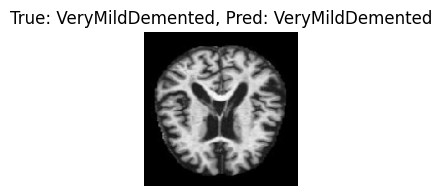

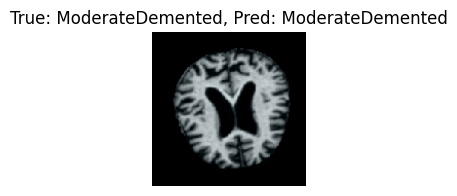

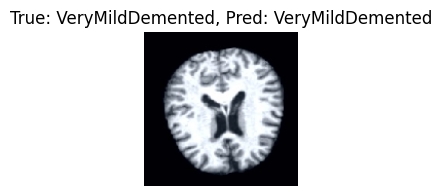

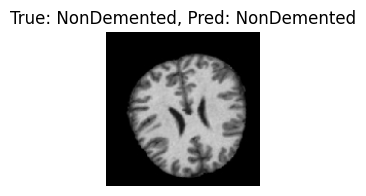

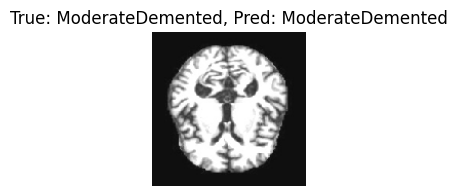

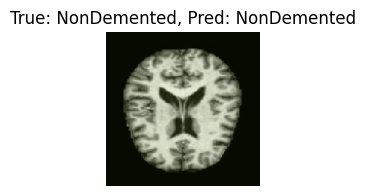

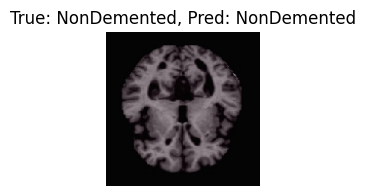

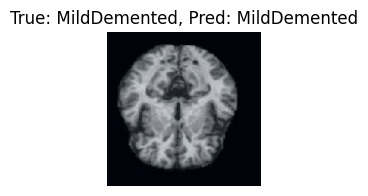

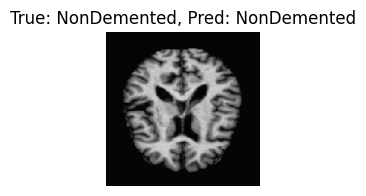

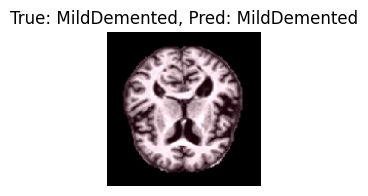

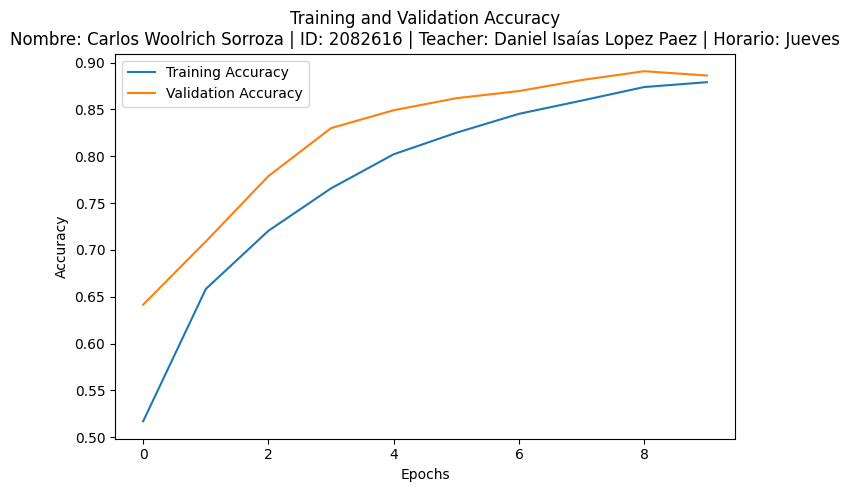

In [4]:
# Variables Personalizadas
nombre = "Carlos Woolrich Sorroza"
id_estudiante = "2082616"
profesor = "Teacher: Daniel Isaías Lopez Paez"
horario = "Horario: Jueves"

# Instalación y configuración de la API de Kaggle
!pip install kaggle
import os
from google.colab import files

# Sube el archivo kaggle.json
uploaded = files.upload()

# Configuración de credenciales de Kaggle
os.makedirs("/root/.kaggle", exist_ok=True)
os.rename("kaggle.json", "/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 600)

# Descarga el dataset
!kaggle datasets download -d uraninjo/augmented-alzheimer-mri-dataset -p /content/

# Extracción del archivo .zip
import zipfile
zip_path = '/content/augmented-alzheimer-mri-dataset.zip'
extract_path = '/content/augmented-alzheimer-mri-dataset/'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verificar archivos extraídos
extracted_files = os.listdir(extract_path)
print("Archivos extraídos:", extracted_files)

# Librerías para el modelo
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model

# Definir la ruta del dataset
dataset_path = "/content/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset"

# Preprocesamiento de datos
img_size = 150
batch_size = 32
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

train_data = datagen.flow_from_directory(
    dataset_path, target_size=(img_size, img_size), batch_size=batch_size,
    class_mode='categorical', subset='training'
)
val_data = datagen.flow_from_directory(
    dataset_path, target_size=(img_size, img_size), batch_size=batch_size,
    class_mode='categorical', subset='validation'
)

# Definición del modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_data.class_indices), activation='softmax')
])

# Compilación y entrenamiento
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, validation_data=val_data, epochs=10, verbose=1)

# Guardar el modelo
model.save("cnn_alzheimer_model.h5")

# Pruebas y predicciones
test_images, test_labels = next(val_data)
predictions = model.predict(test_images)
class_labels = list(train_data.class_indices.keys())

# Mostrar predicciones
for i in range(10):
    plt.figure(figsize=(2, 2))
    plt.imshow(test_images[i])
    plt.title(f"True: {class_labels[np.argmax(test_labels[i])]}, Pred: {class_labels[np.argmax(predictions[i])]}")
    plt.axis('off')
    plt.show()

# Gráfica de precisión
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title(f"Training and Validation Accuracy\nNombre: {nombre} | ID: {id_estudiante} | {profesor} | {horario}")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()